In [11]:
# embeddings = VertexAIEmbeddings()
# Create a vectorstore from documents
from langchain.embeddings import VertexAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch
import langchain
from langchain.llms import VertexAI
import streamlit as st
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings, VertexAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
embeddings = VertexAIEmbeddings()


In [70]:
db = Chroma(persist_directory='vector_databases/Upgrade_db', 
                      embedding_function=embeddings)

In [71]:
LLM = VertexAI(model_name='text-bison@001', max_output_tokens='800', temperature=0)

In [72]:
metadata_field_info = [
    AttributeInfo(
        name = 'url',
        description='Where the document is from. Should be a link to the document',
        type = 'string'
    ),
    AttributeInfo(
        name = 'tag',
        description= "What subc-class the document belongs too. Should be one of 'Others', 'Directory services', 'Cloud/OS', 'Integration', 'Cisco firewall', 'Authentication', 'Cisco dna', 'Design'",
        type = 'string'
    ),
    AttributeInfo(
        name = 'topic_name',
        description = "The topic where the document belongs to.",
        type = 'string'

    ),
    # Attribute info for summary 
    AttributeInfo(
        name = 'summary',
        description = "The summary of the document",
        type = 'string'
    ),
    # attribute info for conversation id
    AttributeInfo(
        name = 'conversation_id',
        description = "The conversation id where the document belongs to",
        type = 'string'
    )

]


In [73]:
document_content_description = "The content of the document for class Design/Integration"

In [74]:
retriever = SelfQueryRetriever.from_llm(
        llm=LLM, 
        vectorstore=db,
        document_contents=document_content_description,
        metadata_field_info=metadata_field_info,
        verbose=True
    )

In [76]:
query = " The issue is that there is no single API that provides the full details of the Network Devices."

In [77]:
context = retriever.get_relevant_documents(query)
context_2 = db.similarity_search(query, k=4)

query='Network Devices' filter=None limit=None


In [78]:
from pprint import pprint
pprint(context)

[Document(page_content="ld/new, due to HW upgrade at the same time for this cluster) in one quick process.thanks,David |||| @curlytopzzzThere is not a single API that provides the full details of the Network Devices. You would need to create a script that executes the GET API for the network devices, captures each individual 'id' or 'name' value, then executes the GET by id/name on each one to capture the details.\nSee the additional info on DevNet:\nhttps://developer.cisco.com/docs/identity-services-engine/v1/#!networkd", metadata={'url': 'https://community.cisco.com/t5/network-access-control/cisco-ise-nad-api-export-for-scheduled-nackup/td-p/4693816', 'tag': 'Integration', 'topic_name': '0_detail_id_patch', 'summary': "The issue is that there is no single API that provides the full details of the Network Devices. To get the full details, you would need to create a script that executes the GET API for the network devices, captures each individual 'id' or 'name' value, then executes th

In [79]:
pprint(context_2)

[Document(page_content='The issue is that there is no single API that provides the full details of the Network Devices. To get the full details, you would need to create a script that executes the GET API for the network devices, captures each individual \'id\' or \'name\' value, then executes the GET by id/name on each one to capture the details. Is there an API to export the NAD database w/ complete device details? I was hoping to see detailed information per devices.By Get I can only have an output(sample):"SearchResult', metadata={'url': 'https://community.cisco.com/t5/network-access-control/cisco-ise-nad-api-export-for-scheduled-nackup/td-p/4693816', 'tag': 'Integration', 'topic_name': '0_detail_id_patch', 'summary': "The issue is that there is no single API that provides the full details of the Network Devices. To get the full details, you would need to create a script that executes the GET API for the network devices, captures each individual 'id' or 'name' value, then executes 

In [81]:
import pandas as pd

In [110]:
# read cluster file 
df = pd.read_excel('dataset/top_topics_aq.xlsx')
df.head()

,topic_id,product_tag,word,score,total_topic_words,class,analysis_window,quarter_for_analysis
0,0,Cisco dna,sda,0.583726,3,Licensing,annual,20233
1,0,Cisco dna,relationship,0.583726,3,Licensing,annual,20233
2,0,Cisco dna,sgt,0.583726,3,Licensing,annual,20233
3,0,Cisco dna,addition,0.583726,3,Licensing,annual,20233
4,0,Cisco dna,required,0.677620,3,Licensing,annual,20233


In [116]:
df[df['topic_id'] == 0]['word'].tolist()

['cause',
 'problem',
 'radius',
 'configuration',
 'error',
 'upgrade',
 'service',
 'deployment',
 'patch',
 'node']

In [112]:
# fileter for class-tag-cluster and annual data- upgrade and others 
df = df[(df['class'] == 'Upgrade') & (df['product_tag'] == 'Others') & (df['analysis_window'] == 'annual')]

In [121]:
df['topic_id'].unique().tolist()

[0, 1]

In [103]:
# cluster 0 words and score 
cluster_0_words = df[df['topic_id'] == 0]['word'].tolist()
cluster_0_score = df[df['topic_id'] == 0]['score'].tolist()


# cluster 1 words and score
cluster_1_words = df[df['topic_id'] == 1]['word'].tolist()
cluster_1_score = df[df['topic_id'] == 1]['score'].tolist()

In [117]:
import plotly.express as px
px.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

In [109]:

import plotly.graph_objects as go

# create two lists of top 10 words and their weights for each cluster
cluster1_words = cluster_0_words
cluster1_weights = cluster_0_score
topic_id_set_1 = 'Topic 0'

cluster2_words = cluster_1_words
cluster2_weights = cluster_1_score
topic_id_set_2 = 'Topic 1'


fig = go.Figure()



fig.add_trace(go.Scatter(
    x=cluster1_words,
    y=cluster1_weights,
    name=topic_id_set_1,
    mode='markers',
    marker=dict(
        size=cluster1_weights,
        color='blue',
        sizemode='diameter',
        sizeref=0.1,
        sizemin=5,
))
)

fig.add_trace(go.Scatter(
    x=cluster2_words,
    y=cluster2_weights,
    name=topic_id_set_2,
    mode='markers',
    marker=dict(
        size=cluster2_weights,
        color='red',
        sizemode='diameter',
        sizeref=0.1,
        sizemin=5,
    )
)
)

# add vertical line to separate the two clusters
fig.update_layout(shapes=[
    dict(
        type= 'line',
        yref='paper',
        xref='x',
        x0=len(cluster1_words)-0.5,
        y0=0,
        x1=len(cluster1_words)-0.5,
        y1=1,
        line=dict(color='black', width=2)
    )
])

# add labels and title 
fig.update_layout(
    title='Top 10 Words for Each Cluster',
    xaxis_title='Words',
    yaxis_title='Weight',)

fig.show()

In [83]:
# read cluster file 
df = pd.read_excel('dataset/tag_clusters.xlsx')
df.head()

,topic,doc,post_x_coordinate,post_y_coordinate,user,topic_id,topic_name,post_url,post_preview,class,analysis_window,quarter_for_analysis,conversation_id,text,summary_text,tag
0,0,person purchase advantage license additio...,0.380220,0.056250,2164,0,0_advantage_license_dna,https://community.cisco.com/t5/cisco-one-discu...,"Hello Folks,\n&nbsp;\nQuick question. I have p...",Licensing,annual,20233,4757953,"<P>Hello Folks,</P>\n<P>&nbsp;</P>\n<P>Quick q...",The issue being faced is that the person is no...,Cisco dna
1,0,understand relationship dna center sda whet...,0.738165,0.836678,23114,0,0_advantage_license_dna,https://community.cisco.com/t5/cisco-digital-n...,"Hello All,\nStarting to get into ISE and DNA a...",Licensing,annual,20233,4725319,"<P>Hello All,</P>\n<P>Starting to get into ISE...",The user is trying to understand the relations...,Cisco dna
2,0,enable policy based enforcement essentia...,0.234175,0.935613,73380,0,0_advantage_license_dna,https://community.cisco.com/t5/software-define...,I have question about ISE&nbsp;I have ISE esse...,Licensing,annual,20233,4614950,<P>I have question about ISE</P><P>&nbsp;</P><...,The issue being faced is that the user wants t...,Cisco dna
3,0,generating alarm smart authorization renew...,0.590524,0.374223,63672,0,0_smart_failure_authorization,https://community.cisco.com/t5/network-access-...,"Hi guys,&nbsp;I am running two node deployment...",Licensing,annual,20233,4638108,"<P>Hi guys,</P><P>&nbsp;</P><P>I am running tw...",The issue being faced is that ISE is generatin...,Cisco firewall
4,0,smart license box connected internet able o...,0.152381,0.551912,84584,0,0_smart_failure_authorization,https://community.cisco.com/t5/network-access-...,I want to smart license my ISE box which ia no...,Licensing,annual,20233,4613090,<P>I want to smart license my ISE box which ia...,The customer wants to smart license their ISE ...,Cisco firewall


In [90]:
# Filter for upgrade class and others tag 
df = df[(df['class'] == 'Upgrade') & (df['tag'] == 'Others')]

# Filter for annual analysis window
df = df[df['analysis_window'] == 'annual']

# Filter for documents that are not nan
df = df[df['text'].notna()]

# # get x coordinate of the document
x = df['post_x_coordinate'].tolist()
y = df['post_y_coordinate'].tolist()

# # hover info will be the summary 
# hover_info = df['summary_text'].tolist()


# scatter plot dataframe with topic_id as color 
df_scatter = df[['topic_id', 'post_x_coordinate', 'post_y_coordinate', 'summary_text']]


In [92]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(df_scatter, x="post_x_coordinate", y="post_y_coordinate", color="topic_id", hover_data=['summary_text'])



fig.show()

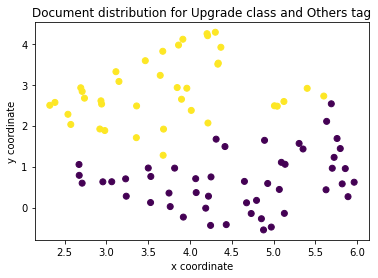

In [91]:
import matplotlib.pyplot as plt

# plot scatter plot 
plt.scatter(df_scatter['post_x_coordinate'], df_scatter['post_y_coordinate'], c=df_scatter['topic_id'], cmap='viridis')

# # add hover info
# for i, txt in enumerate(hover_info):
#     plt.annotate(txt, (x[i], y[i]))

# add labels and title 
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Document distribution for Upgrade class and Others tag')

plt.show()